## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
#loading dataset
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:

# Loading the necessary libraries
%load_ext tensorboard
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization,Flatten
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Find no.of samples are there in training and test datasets

In [3]:
#checking the rows of training dataset
print('The training features data shape is',X_train.shape)
print(X_train[0:2])

The training features data shape is 60000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [4]:
#checking rows of test dataset
print('The testing features data shape is',X_test.shape[0])
print(X_test[0:2])

The testing features data shape is 10000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Find dimensions of an image in the dataset

In [5]:
print('train data size is',X_train.shape[1:3]), print('test data size is',X_test.shape[1:3])

train data size is (28, 28)
test data size is (28, 28)


(None, None)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [17]:
num_classes =10
y_trainn = tf.keras.utils.to_categorical(y_train,num_classes)
y_trainn

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_testn = tf.keras.utils.to_categorical(y_test,num_classes)
y_testn

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Normalize both the train and test image data from 0-255 to 0-1

In [6]:
#normalizing the data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_trains = X_train/255.0
X_tests = X_test/255.0

In [10]:
X_trains[1:3]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [8]:
#reshaping the data 
X_trainr = X_trains.reshape(X_trains.shape[0],28,28,1)
X_testr = X_tests.reshape(X_tests.shape[0],28,28,1)

### Import the necessary layers from keras to build the model

In [9]:
#loading necessary libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Reshape,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
#building sequential model
model = Sequential()


#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Convolution2D(32, (3, 3), activation='relu',name='conv_2'))


model.add(Flatten())


#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))


#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation='softmax',name='dense_2'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,mode ='auto', verbose =1)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
output = model.fit(X_trainr, y_trainn, validation_data=(X_testr, y_testn), epochs=10, batch_size = 30,callbacks = [callback])

Epoch 1/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3697 - accuracy: 0.8679 - val_loss: 0.3089 - val_accuracy: 0.8913
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2290 - accuracy: 0.9155 - val_loss: 0.2546 - val_accuracy: 0.9082
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1660 - accuracy: 0.9392 - val_loss: 0.2595 - val_accuracy: 0.9128
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1171 - accuracy: 0.9566 - val_loss: 0.2726 - val_accuracy: 0.9096
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0756 - accuracy: 0.9718 - val_loss: 0.3152 - val_accuracy: 0.9154
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9802 - val_loss: 0.3514 - val_accuracy: 0.9118
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0379 - accuracy: 0.9866 - val_loss: 0.3990 - val_accuracy:

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [14]:
#Introducing dropout and maxpool layers

model2 = Sequential()


#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model2.add(BatchNormalization())
model2.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model2.add(Convolution2D(32, (3, 3), activation='relu',name='conv_2'))
model2.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model2.add(Dropout(0.25,name='drop_1'))
model2.add(Flatten())


#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model2.add(Dense(128, activation='relu',name='dense_1'))
model2.add(Dropout(0.25,name='drop_2'))
#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model2.add(Dense(10, activation='softmax',name='dense_2'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,verbose = 1,mode ='auto')
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
output2 = model2.fit(X_trainr, y_trainn, validation_data=(X_testr, y_testn), epochs=20, batch_size = 30,callbacks = [callback])

Epoch 1/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4009 - accuracy: 0.8556 - val_loss: 0.2788 - val_accuracy: 0.8970
Epoch 2/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.9017 - val_loss: 0.2447 - val_accuracy: 0.9113
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2240 - accuracy: 0.9153 - val_loss: 0.2396 - val_accuracy: 0.9122
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1956 - accuracy: 0.9256 - val_loss: 0.2347 - val_accuracy: 0.9164
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1733 - accuracy: 0.9355 - val_loss: 0.2255 - val_accuracy: 0.9217
Epoch 6/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1547 - accuracy: 0.9420 - val_loss: 0.2242 - val_accuracy: 0.9236
Epoch 7/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1413 - accuracy: 0.9463 - val_loss: 0.2349 - val_accuracy:

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [12]:
from keras.preprocessing.image import ImageDataGenerator
img_generator = ImageDataGenerator(featurewise_center =False,
                                                                samplewise_center = False,
                                                                samplewise_std_normalization=False,
                                                                featurewise_std_normalization = False,
                                                                rotation_range = 50,
                                                                zca_whitening = False,
                                                                width_shift_range=0.1,
                                                                height_shift_range=0.1,
                                                                horizontal_flip=False,
                                                                vertical_flip = False)
img_generator.fit(X_trainr)                                                    

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

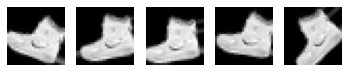

In [13]:
from matplotlib import pyplot as plt
gen = img_generator.flow(X_trainr[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [14]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('/content/gdrive/My Drive/MNIST.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [33]:
len(X_trainr) , len(X_testr)

(60000, 10000)

In [34]:
#building model iwth augmented data

model3 = Sequential()


#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model3.add(BatchNormalization())
model3.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model3.add(Convolution2D(32, (3, 3), activation='relu',name='conv_2'))
model3.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model3.add(Dropout(0.25,name='drop_1'))


model3.add(Flatten())


#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model3.add(Dense(128, activation='relu',name='dense_1'))
model3.add(Dropout(0.25,name='drop_2'))
#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model3.add(Dense(10, activation='softmax',name='dense_2'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,verbose = 1,mode ='auto')
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#output3 = model3.fit(X_trainr, y_trainn, validation_data=(X_testr, y_testn), epochs=20, batch_size = 30,callbacks = [callback])

In [37]:
output3 = model3.fit_generator(img_generator.flow(X_trainr,y_trainn),
                    epochs=20,
                    steps_per_epoch=60000/100,  #Number of training images//batch_size
                    validation_data=(X_testr,y_testn),
                    validation_steps = 10000//100, #Number of test images//batch_size
                    callbacks = [callback,model_checkpoint])

Epoch 1/20
596/600 [============================>.] - ETA: 0s - loss: 1.0351 - accuracy: 0.6163
Epoch 00001: val_accuracy improved from -inf to 0.74390, saving model to /content/gdrive/My Drive/MNIST.h5
600/600 [==============================] - 5s 9ms/step - loss: 1.0327 - accuracy: 0.6174 - val_loss: 0.6535 - val_accuracy: 0.7439
Epoch 2/20
596/600 [============================>.] - ETA: 0s - loss: 0.7756 - accuracy: 0.7111
Epoch 00002: val_accuracy improved from 0.74390 to 0.78170, saving model to /content/gdrive/My Drive/MNIST.h5
600/600 [==============================] - 5s 9ms/step - loss: 0.7756 - accuracy: 0.7111 - val_loss: 0.5659 - val_accuracy: 0.7817
Epoch 3/20
595/600 [============================>.] - ETA: 0s - loss: 0.7173 - accuracy: 0.7261
Epoch 00003: val_accuracy improved from 0.78170 to 0.78490, saving model to /content/gdrive/My Drive/MNIST.h5
600/600 [==============================] - 5s 9ms/step - loss: 0.7170 - accuracy: 0.7266 - val_loss: 0.5614 - val_accuracy:

In [ ]:
#increasing two more convolutional layer to check if accuracy increases

model4 = Sequential()


#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model4.add(BatchNormalization())
model4.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model4.add(Convolution2D(32, (3, 3), activation='relu',name='conv_2'))
model4.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))


model4.add(BatchNormalization())
model4.add(Convolution2D(64, kernel_size=(3, 3),
                 activation='relu',
                 name='conv_3'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model4.add(Convolution2D(64, (3, 3), activation='relu',name='conv_4'))
model4.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
model4.add(Dropout(0.25,name='drop_2'))


model4.add(Flatten())
#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model4.add(Dense(128, activation='relu',name='dense_1'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model4.add(Dense(10, activation='softmax',name='dense_2'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,verbose = 1,mode ='auto')
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#output3 = model3.fit(X_trainr, y_trainn, validation_data=(X_testr, y_testn), epochs=20, batch_size = 30,callbacks = [callback])

In [19]:
output4 = model4.fit_generator(img_generator.flow(X_trainr,y_trainn),
                    epochs=40,
                    steps_per_epoch=60000/32,  #Number of training images//batch_size
                    initial_epoch = 25,
                    validation_data=(X_testr,y_testn),
                    validation_steps = 10000//32, #Number of test images//batch_size
                    callbacks = [callback,model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 26/40
1874/1875 [============================>.] - ETA: 0s - loss: 0.7580 - accuracy: 0.7160WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 312 batches). You may need to use the repeat() function when building your dataset.

Epoch 00026: val_accuracy improved from -inf to 0.80900, saving model to /content/gdrive/My Drive/MNIST.h5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7579 - accuracy: 0.7161 - val_loss: 0.5088 - val_accuracy: 0.8090
Epoch 27/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5514 - accuracy: 0.7924
Epoch 28/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4904 - accuracy: 0.8181
Epoch 29/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4547 - accuracy: 0.8323
Epoch

###  Report the final train and validation accuracy

In [20]:
model4.evaluate(X_testr,y_testn)

313/313 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8807


[0.3264395296573639, 0.8806999921798706]

In [21]:
model4.evaluate(X_trainr,y_trainn)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2906 - accuracy: 0.8913


[0.2905520796775818, 0.8912500143051147]

In [60]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv_1 (Conv2D)              (None, None, None, 32)    320       
_________________________________________________________________
conv_2 (Conv2D)              (None, None, None, 32)    9248      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, None, None, 32)    0         
_________________________________________________________________
batch_normalization_7 (Batch (None, None, None, 32)    128       
_________________________________________________________________
conv_3 (Conv2D)              (None, None, None, 64)    18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, None, None, 64)   

In [ ]:
#after introduing 2 additional conv layer with 64 3*3 filter model accuracy increased to 88 from 85 %

In [26]:
X_testr.shape

(10000, 28, 28, 1)

In [25]:
X_test = np.squeeze(X_testr)
X_test.shape

(10000, 28, 28)

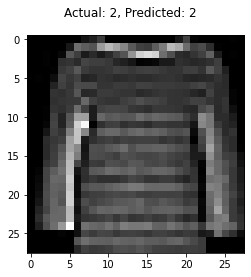

In [33]:
import numpy as np
#Prediction
#actual and #prediction are same for the below class
img_num = np.random.randint(0, X_testr.shape[0])


prediction = model4.predict(np.expand_dims(X_testr[img_num], axis=0))

#class with the highest probability 
predicted_class = np.argmax(prediction[0])

#Show results
plt.imshow(X_test[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Actual: ' + str(np.argmax(y_testn[img_num])) + ', Predicted: ' + str(predicted_class))
plt.show()

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [63]:
from keras.datasets import cifar10,mnist

### **Load CIFAR10 dataset**

In [64]:
#loading CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [68]:
print('The testing features data shape is',X_test.shape[0])


The testing features data shape is 10000


In [69]:
print('The training features data shape is',X_train.shape[0])


The training features data shape is 50000


In [70]:
X_test.shape , X_train.shape

((10000, 32, 32, 3), (50000, 32, 32, 3))

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [78]:
#normalizing data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_trains = X_train/255.0
X_tests = X_test/255.0

In [85]:
#reshaping data
X_train = X_trains.reshape(X_trains.shape[0],32,32,3)
X_testr = X_tests.reshape(X_tests.shape[0],32,32,3)

In [86]:
from keras.preprocessing.image import ImageDataGenerator
img_generator1 = ImageDataGenerator(featurewise_center =False,
                                  samplewise_center = False,
                                  samplewise_std_normalization=False,
                                  featurewise_std_normalization = False,
                                  rotation_range = 20,
                                  zca_whitening = False,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  vertical_flip = True)
                                                 

### **Prepare/fit the generator.**

In [87]:
#fitting generator
img_generator1.fit(X_train)   

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

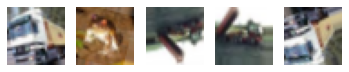

In [88]:
#viewing im,ages from generator
from matplotlib import pyplot as plt
gen1 = img_generator1.flow(X_train[0:3], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen1.next().squeeze())
    plt.plot()
plt.show()

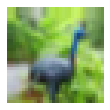

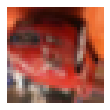

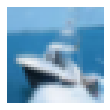

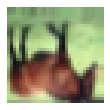

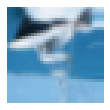

In [99]:
from matplotlib import pyplot as plt
gen1 = img_generator1.flow(X_train[5:9], batch_size=1)
for i in range(1, 6):
    plt.subplots(figsize=(10,9))
    plt.subplot(1,5,i,)
    plt.axis("off")
    plt.imshow(gen1.next().squeeze())
    plt.plot()
    plt.show()

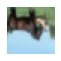

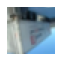

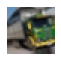

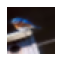

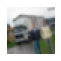

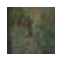

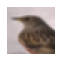

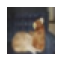

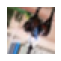

In [100]:
from matplotlib import pyplot as plt
gen1 = img_generator1.flow(X_train[10:19], batch_size=1)
for i in range(1, 10):
    plt.subplots(figsize=(10,9))
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(gen1.next().squeeze())
    plt.plot()
plt.show()